In [2]:
import csv

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'hand_landmarks.csv'
#model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
#tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
model_save_path = 'new_hand_classifier.hdf5'
tflite_save_path = 'new_hand_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 26

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((21, 2, 1), input_shape=(21 * 2, )),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 21, 2, 1)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 2, 32)         128       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 2, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 2, 64)         6208      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 640)              

In [12]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [13]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


22/29 [=====================>........] - ETA: 0s - loss: 3.0013 - accuracy: 0.1669
Epoch 1: saving model to new_hand_classifier.hdf5
29/29 [==============================] - 1s 13ms/step - loss: 2.8599 - accuracy: 0.2025 - val_loss: 1.9694 - val_accuracy: 0.5008
Epoch 2/1000
21/29 [====================>.........] - ETA: 0s - loss: 1.8465 - accuracy: 0.4010

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to new_hand_classifier.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 1.7256 - accuracy: 0.4378 - val_loss: 0.9357 - val_accuracy: 0.8142
Epoch 3/1000
24/29 [=======================>......] - ETA: 0s - loss: 1.0508 - accuracy: 0.6520
Epoch 3: saving model to new_hand_classifier.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 1.0105 - accuracy: 0.6669 - val_loss: 0.3930 - val_accuracy: 0.9750
Epoch 4/1000
22/29 [=====================>........] - ETA: 0s - loss: 0.6206 - accuracy: 0.7937
Epoch 4: saving model to new_hand_classifier.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.5854 - accuracy: 0.8061 - val_loss: 0.1767 - val_accuracy: 0.9800
Epoch 5/1000
26/29 [=========================>....] - ETA: 0s - loss: 0.3507 - accuracy: 0.8912
Epoch 5: saving model to new_hand_classifier.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 0.3417 - accuracy: 0.8931 - val_loss: 0.0942 - val_accuracy: 0.

In [15]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 2ms/step - loss: 1.3937e-06 - accuracy: 1.0000


In [16]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [17]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 113ms/step
[0.0000000e+00 4.4233748e-25 1.0000000e+00 2.8301858e-19 4.4347185e-22
 2.2582945e-22 1.0634626e-17 4.7198125e-23 1.6321731e-26 8.4153335e-36
 0.0000000e+00 1.4605465e-23 1.2982340e-16 1.5730135e-27 1.9501063e-13
 1.7855905e-17 9.6040249e-34 0.0000000e+00 1.7620894e-33 0.0000000e+00
 1.0421751e-29 1.4243174e-27 4.4631859e-27 1.2088852e-20 1.0192990e-31
 4.3244726e-31]
2


# Confusion matrix

38/38 [==============================] - 0s 3ms/step


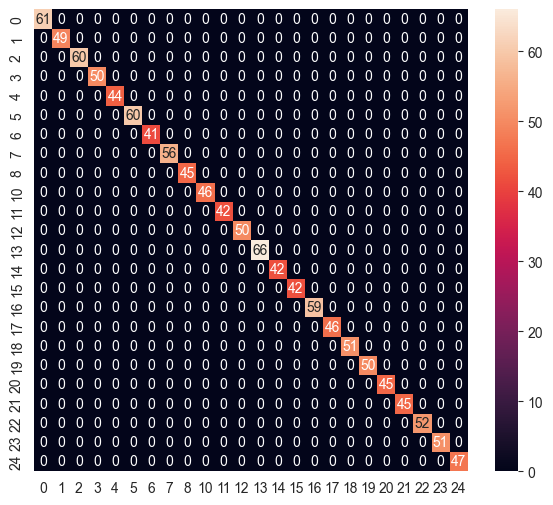

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        56
           8       1.00      1.00      1.00        45
          10       1.00      1.00      1.00        46
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        50
          13       1.00      1.00      1.00        66
          14       1.00      1.00      1.00        42
          15       1.00      1.00      1.00        42
          16       1.00      1.00      1.00        59
          17       1.00      1.00      1.00        46
     

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [29]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmpv334e02h\assets


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmpv334e02h\assets


105600

# Inference test

In [21]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [22]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [24]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [25]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.2867520e-44 5.0437962e-25 1.0000000e+00 4.5585122e-19 4.6977028e-22
 2.4639178e-22 1.0823957e-17 7.1030298e-23 1.7996894e-26 9.5519118e-36
 8.2961073e-41 1.7472919e-23 1.5366181e-16 1.8685981e-27 2.2490413e-13
 2.2956138e-17 1.2499945e-33 1.8439686e-41 1.9384829e-33 3.7008292e-41
 1.2872580e-29 1.6883567e-27 6.4354252e-27 1.4524313e-20 9.3185669e-32
 5.6540051e-31]
2


In [26]:
# Save the model
model.save(model_save_path, include_optimizer=False)

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Write the TFLite file
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmph27wmkwp\assets


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmph27wmkwp\assets
